In [2]:
import seaborn as sns 
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, model_selection, svm


In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
'''
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)
'''

'\n1. age - age in years\n\n2. sex - sex (1 = male; 0 = female)\n\n3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)\n\n4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)\n\n5. chol - serum cholestoral in mg/dl\n\n6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)\n\n7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)\n\n8. thalach - maximum heart rate achieved\n\n9. exang - exercise induced angina (1 = yes; 0 = no)\n\n10. oldpeak - ST depression induced by exercise relative to rest\n\n11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)\n\n12. ca - number of major vessels (0-3) colored by flourosopy\n\n13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect\n\n14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowin

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

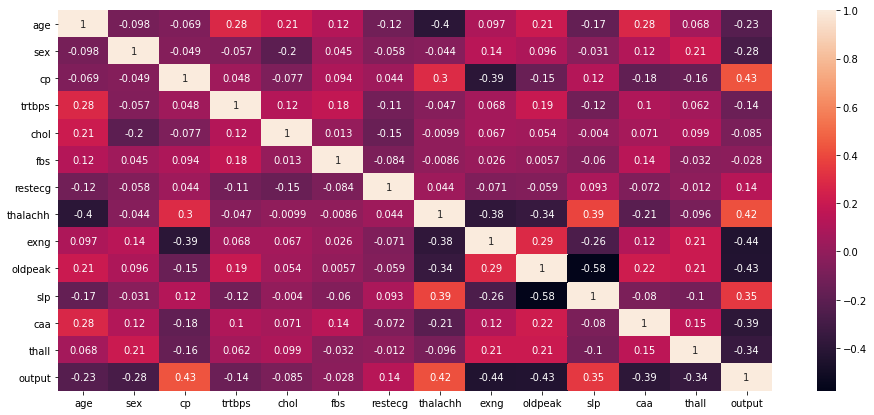

In [8]:
pd.DataFrame(df.corr()['output']).sort_values(by='output',ascending=False)
def resizeplot(l,a):
    plt.figure(figsize=(l,a))
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

In [9]:
corr = df.corr()['output']

corr = corr[abs(corr) >= 0.3]

corr.index

sel_cols = list(corr.index)
print(sel_cols)

['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


0...1...2...3...4...5...6...7...

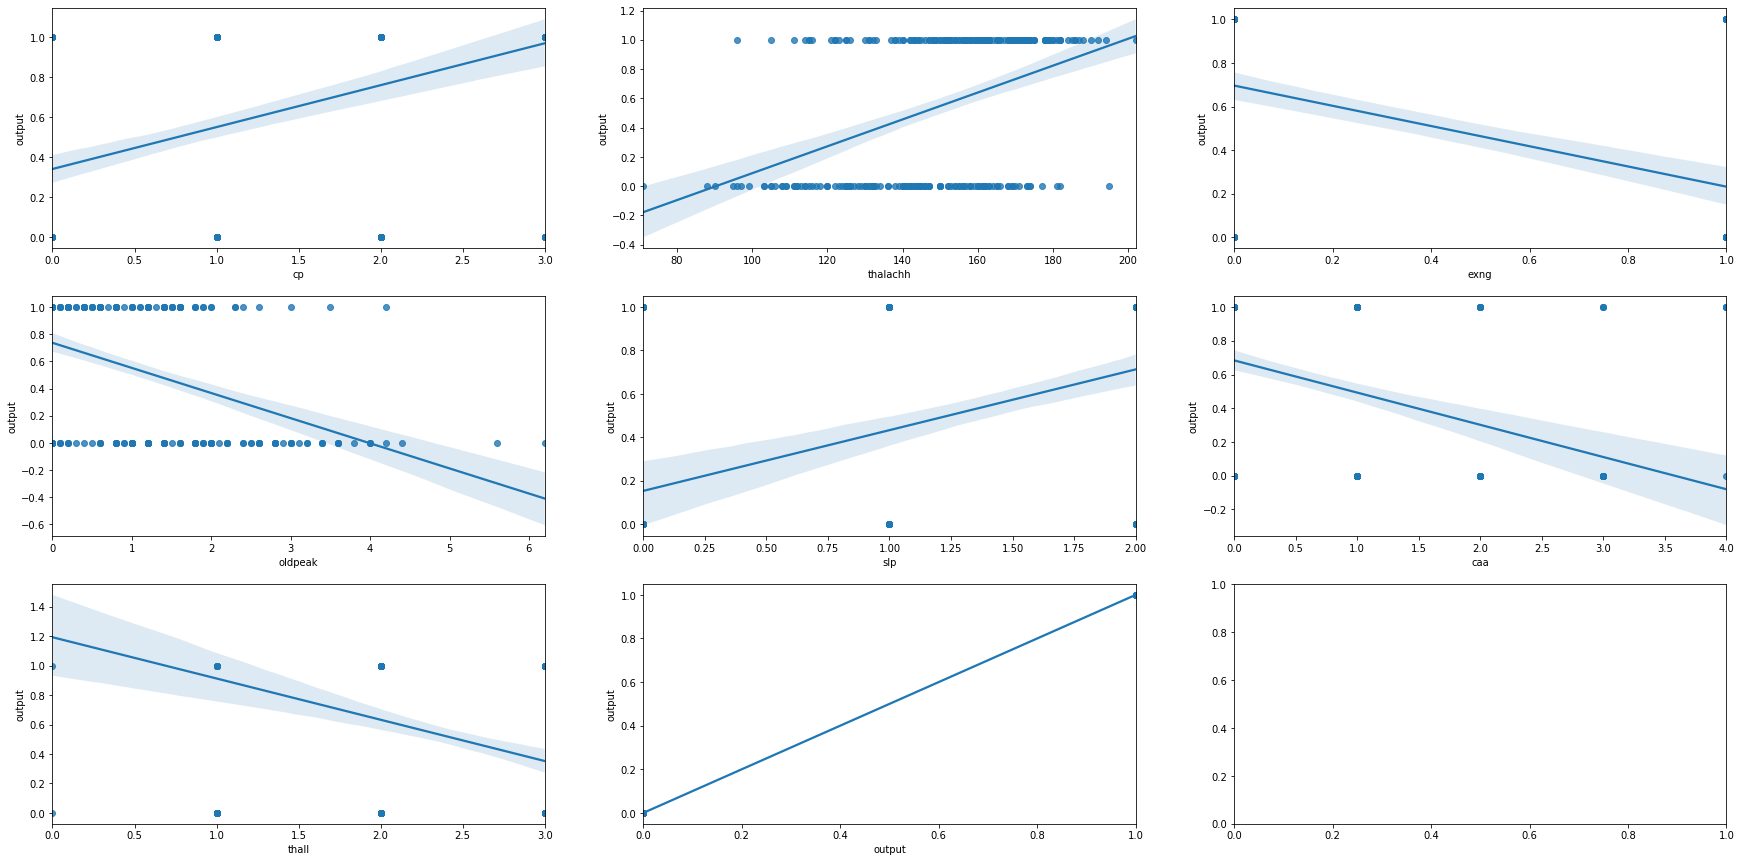

In [12]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,15))


# 8 Features
index=0
for row in range(num_rows):
    for col in range(num_cols): 
        if index == len(sel_cols):
            break
        print(index, end='...')
        sns.regplot(y='output',x=sel_cols[index], data=df, ax=axes[row, col])
        index+=1 
        
           
plt.show()

In [28]:
df.corr()['output'] 


age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

0
[]
1
1
[1]
2
[1]
3
[1]
4
[1]
5
[1]
6
[1]
7
[1]
8
[1]
9
[1]
10
[1]
11
[1]
12
[1]
13
[1]
[1]


In [31]:
df.main

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
298    NaN
299    NaN
300    NaN
301    NaN
302    NaN
Name: main, Length: 303, dtype: object

In [13]:
x = df[['cp', 'thalachh', 'exng']]
y = df['output']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


<AxesSubplot:xlabel='thalachh', ylabel='output'>

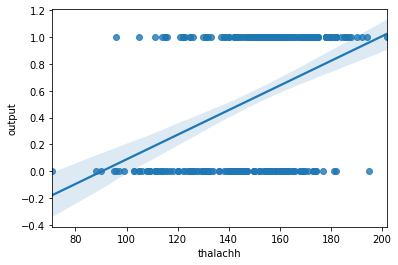

In [14]:
sns.regplot(x='thalachh',y='output',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

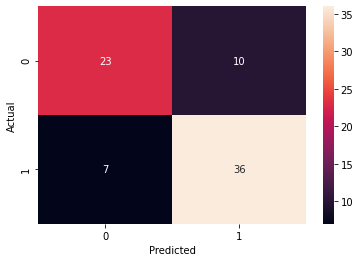

In [15]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [16]:
tP = cm[0][0]
fP = cm[0][1]
fN = cm[1][0]
tN = cm[1][1]

array = (tP,fP,fN,tN)
print(array)

(23, 7, 10, 36)


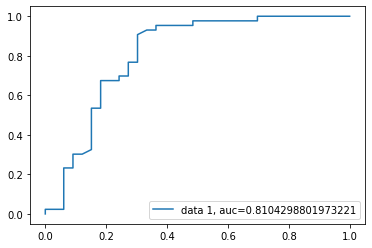

accuracy is 81.0429880197322


In [22]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(f"accuracy is {(auc * 100)}")

In [ ]:
import csv
import random
import math
import operator

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def manDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += abs(instance1[x] - instance2[x])
    return distance


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = manDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

    def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


    def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


    def main():
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print(f'Train set:   {repr(len(trainingSet))}')
    print(f'Test set:   {repr(len(testSet))}') 
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    print(f'Accuracy:{accuracy}')